<a href="https://colab.research.google.com/github/Hong-Soonbin/kaggle_competition/blob/main/kaggle_Tabular_Playground_Series/Sep_2022/kaggle_Tabular_Playground_Series_Sep_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import

In [ ]:
import pandas as pd
import numpy as np
import os
import cv2
import gc
import re
import copy
import itertools
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
from tqdm.notebook import tqdm
from datetime import datetime
import json,itertools
from typing import Optional
from glob import glob
import warnings
from IPython import display as ipd
warnings.filterwarnings("ignore")
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import matplotlib as mpl
from matplotlib.patches import Rectangle
import seaborn as sns
import random
from joblib import Parallel, delayed
import os, shutil
import datetime 
import holidays
import dateutil.easter as easter

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet,SGDRegressor
from sklearn.model_selection import StratifiedGroupKFold

from xgboost import XGBRegressor
import xgboost as xgb
import lightgbm as lgb
from xgboost import plot_importance

from xgboost import plot_importance
from matplotlib import pyplot
import missingno as msno
import plotly.express as px



# Keras
import tensorflow as tf

from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from lightgbm import LGBMRegressor

In [ ]:
!pip install optuna
import optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 348 kB 2.7 MB/s 
     |████████████████████████████████| 209 kB 57.3 MB/s 
     |████████████████████████████████| 81 kB 8.7 MB/s 
     |████████████████████████████████| 78 kB 6.0 MB/s 
     |████████████████████████████████| 147 kB 56.7 MB/s 
     |████████████████████████████████| 49 kB 5.9 MB/s 
     |████████████████████████████████| 112 kB 69.7 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=55a4a9e4fcb0b595a9b068f6a15a4a4189496248e113b3c947347bdc424b2823
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl
%matplotlib inline
mpl.rc('font', size = 10)

import warnings

import numpy as np
import pandas as pd
pd.options.display.max_columns = 999
import scipy

import os
import glob

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer, OneHotEncoder, LabelEncoder, OrdinalEncoder

In [ ]:
import dateutil.easter as easter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import glob

path = '/content/drive/MyDrive/data/Sep'

files = glob.glob(path + '/*.csv')
for file in files:
    if 'train' in file:
        train = pd.read_csv(file)
    elif 'test' in file:
        test = pd.read_csv(file)
    elif 'sample' in file:
        sub = pd.read_csv(file)
train.shape, test.shape, sub.shape

((70128, 6), (17520, 5), (17520, 2))

In [ ]:
df = pd.concat([train,test])
df.shape

(87648, 6)

In [ ]:
def infoDF(data):
    floatColCounter = 0
    floatCols = []
    intColCounter = 0
    intCols = []
    stringColCounter = 0
    stringCols = []
    print('No of rows-> {}, No of columns-> {}'.format(data.shape[0], data.shape[1]))
    print('          ------------------------          ')
    for column in data.columns:
        if data[column].dtype == int:
            intColCounter += 1
            print('{} dtype -> integer, % 결측치 비율-> {}%, 교유값 수-> {}'.format(column, round((data[column].isnull().sum()/data.shape[0])*100, 2), data[column].nunique()))
            intCols.append(column)
        elif data[column].dtype == float:
            floatColCounter += 1
            print('{} dtype -> float, % 결측치 비율-> {}%, 고윳값 수-> {}'.format(column, round((data[column].isnull().sum()/data.shape[0])*100, 2), data[column].nunique()))
            floatCols.append(column)
        else:
            stringColCounter += 1
            print('{} dtype -> string, % 결측치 비율-> {}%, 고윳값 수-> {}'.format(column, round((data[column].isnull().sum()/data.shape[0])*100, 2), data[column].nunique()))
            stringCols.append(column)
            
    print('No of integer column-> {}, No of floating column-> {}, No of string or object columns-> {}'.format(intColCounter, floatColCounter, stringColCounter))
    print('          ------------------------          ')
    print('% of Null/Missing Values in training data-> {}%'.format(round((data.isnull().sum().sum()/(data.shape[0]*data.shape[1]))*100, 2)))
    print('          ------------------------          ')
    return intCols, floatCols, stringCols
int_col, float_col, string_col = infoDF(df)

No of rows-> 87648, No of columns-> 6
          ------------------------          
row_id dtype -> integer, % 결측치 비율-> 0.0%, 교유값 수-> 87648
date dtype -> string, % 결측치 비율-> 0.0%, 고윳값 수-> 1826
country dtype -> string, % 결측치 비율-> 0.0%, 고윳값 수-> 6
store dtype -> string, % 결측치 비율-> 0.0%, 고윳값 수-> 2
product dtype -> string, % 결측치 비율-> 0.0%, 고윳값 수-> 4
num_sold dtype -> float, % 결측치 비율-> 19.99%, 고윳값 수-> 699
No of integer column-> 1, No of floating column-> 1, No of string or object columns-> 4
          ------------------------          
% of Null/Missing Values in training data-> 3.33%
          ------------------------          


In [ ]:
# df.set_index('row_id', drop=True, inplace=True)
# train.set_index('row_id', drop=True, inplace=True)
# # test.set_index('row_id', drop=True, inplace=True)

KeyError: ignored

In [ ]:
train['date'] = train['date'].astype(np.datetime64)
test['date'] = test['date'].astype(np.datetime64)

#EDA

## ['country', 'store', 'product'] 피처 탐색

In [ ]:
#가설1: 피처의 고윳값 별 조합의 누락이 존재하는가?
'''
country 고윳값 6
store   고윳값 2
product 고윳값 4
조합의 수는 6x2x4= 48가지 이어야한다.
아니라면 누락이 있고 피처엔지니어링에 중요한 역할을 할 수 있다.
'''
features = ['country', 'store', 'product']
combination_train = set([str(i) for i in train[features].values])

display(combination_train, len(combination_train))
#누락이 없다.

{"['Belgium' 'KaggleMart' 'Kaggle Advanced Techniques']",
 "['Belgium' 'KaggleMart' 'Kaggle Getting Started']",
 "['Belgium' 'KaggleMart' 'Kaggle Recipe Book']",
 "['Belgium' 'KaggleMart' 'Kaggle for Kids: One Smart Goose']",
 "['Belgium' 'KaggleRama' 'Kaggle Advanced Techniques']",
 "['Belgium' 'KaggleRama' 'Kaggle Getting Started']",
 "['Belgium' 'KaggleRama' 'Kaggle Recipe Book']",
 "['Belgium' 'KaggleRama' 'Kaggle for Kids: One Smart Goose']",
 "['France' 'KaggleMart' 'Kaggle Advanced Techniques']",
 "['France' 'KaggleMart' 'Kaggle Getting Started']",
 "['France' 'KaggleMart' 'Kaggle Recipe Book']",
 "['France' 'KaggleMart' 'Kaggle for Kids: One Smart Goose']",
 "['France' 'KaggleRama' 'Kaggle Advanced Techniques']",
 "['France' 'KaggleRama' 'Kaggle Getting Started']",
 "['France' 'KaggleRama' 'Kaggle Recipe Book']",
 "['France' 'KaggleRama' 'Kaggle for Kids: One Smart Goose']",
 "['Germany' 'KaggleMart' 'Kaggle Advanced Techniques']",
 "['Germany' 'KaggleMart' 'Kaggle Getting Star

48

In [ ]:
#가설2: 고윳값의 모든 조합이 존재한다면 빈도는 고르게 존재하는가
features = ['country', 'store', 'product']
train.groupby(features)["num_sold"].count()
#1461개씩 고르게 존재한다.

country  store       product                         
Belgium  KaggleMart  Kaggle Advanced Techniques          1461
                     Kaggle Getting Started              1461
                     Kaggle Recipe Book                  1461
                     Kaggle for Kids: One Smart Goose    1461
         KaggleRama  Kaggle Advanced Techniques          1461
                     Kaggle Getting Started              1461
                     Kaggle Recipe Book                  1461
                     Kaggle for Kids: One Smart Goose    1461
France   KaggleMart  Kaggle Advanced Techniques          1461
                     Kaggle Getting Started              1461
                     Kaggle Recipe Book                  1461
                     Kaggle for Kids: One Smart Goose    1461
         KaggleRama  Kaggle Advanced Techniques          1461
                     Kaggle Getting Started              1461
                     Kaggle Recipe Book                  1461
                

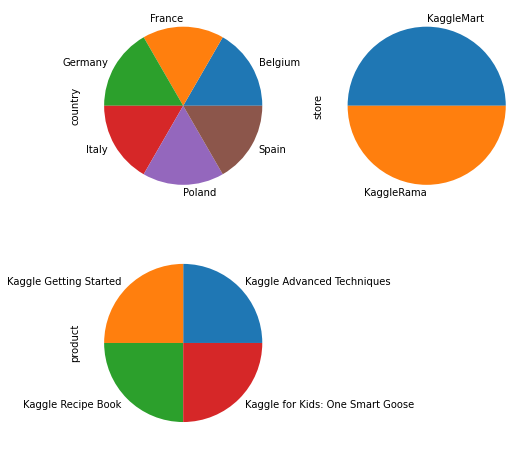

In [ ]:
#고윳값별 분포 시각화
features = ['country', 'store', 'product']
plt.figure(figsize= (8,8))

for i, feature in enumerate(features):
    plt.subplot(2,2,i+1)
    train[feature].value_counts().plot.pie()
# 모두 균일하게 존재한다.

## date 시계열 탐색

In [ ]:
print(f'train time series {min(train["date"])}   -   {max(train["date"])}\n')
print(f'test  time series {min(test["date"])}   -   {max(test["date"])}')
#train 17-20년
#test 21년

train time series 2017-01-01 00:00:00   -   2020-12-31 00:00:00

test  time series 2021-01-01 00:00:00   -   2021-12-31 00:00:00


In [ ]:
# 주별 달별 판매량 데이터셋 생성
weekly_df = train.groupby(["country","store", "product", pd.Grouper(key="date", freq="W")])["num_sold"].sum().rename("num_sold").reset_index()

monthly_df = train.groupby(["country","store", "product", pd.Grouper(key="date", freq="MS")])["num_sold"].sum().rename("num_sold").reset_index()
monthly_df

,country,store,product,date,num_sold
0,Belgium,KaggleMart,Kaggle Advanced Techniques,2017-01-01,13345
1,Belgium,KaggleMart,Kaggle Advanced Techniques,2017-02-01,12556
2,Belgium,KaggleMart,Kaggle Advanced Techniques,2017-03-01,14137
3,Belgium,KaggleMart,Kaggle Advanced Techniques,2017-04-01,14575
4,Belgium,KaggleMart,Kaggle Advanced Techniques,2017-05-01,14338
...,...,...,...,...,...
2299,Spain,KaggleRama,Kaggle for Kids: One Smart Goose,2020-08-01,4578
2300,Spain,KaggleRama,Kaggle for Kids: One Smart Goose,2020-09-01,4254
2301,Spain,KaggleRama,Kaggle for Kids: One Smart Goose,2020-10-01,4644
2302,Spain,KaggleRama,Kaggle for Kids: One Smart Goose,2020-11-01,4437


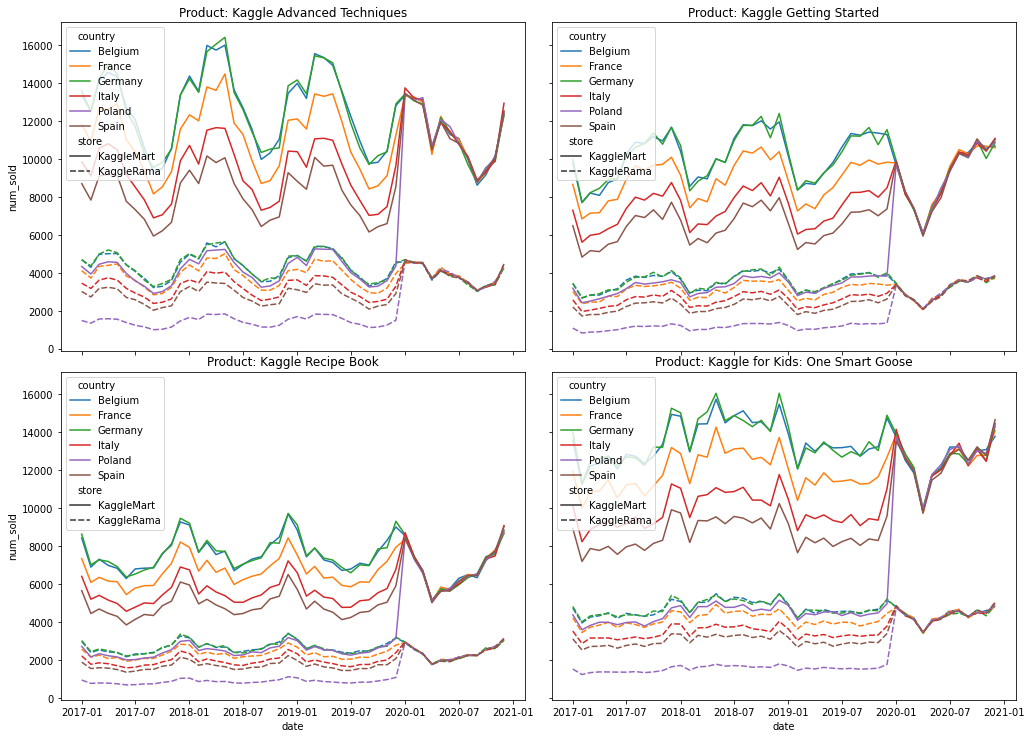

In [ ]:
# 국가,상점별 판매량 추이
f,ax = plt.subplots(2,2,figsize=(14,10), sharex = True, sharey=True)
f.tight_layout()
for n,prod in enumerate(monthly_df["product"].unique()):
    plot_df = monthly_df.loc[monthly_df["product"] == prod]
    sns.lineplot(data=plot_df, x="date", y="num_sold", hue="country", style="store",ax=ax[n//2,n%2])
    ax[n//2,n%2].set_title("Product: "+str(prod))

1. 각각 product마다 다른 패턴을 가진다.    
2. country, store별 sale 패턴이 비슷하다.
3. 확실하게 2020년에 어떤 일이 발생했다.

## store피처 탐색

In [ ]:
#store별로 매출비중은 어떻게 될까?
store_weights = train.groupby('store')['num_sold'].sum()/train['num_sold'].sum()
store_weights
#KaggleMart    0.742515
#KaggleRama    0.257485

store
KaggleMart    0.742515
KaggleRama    0.257485
Name: num_sold, dtype: float64

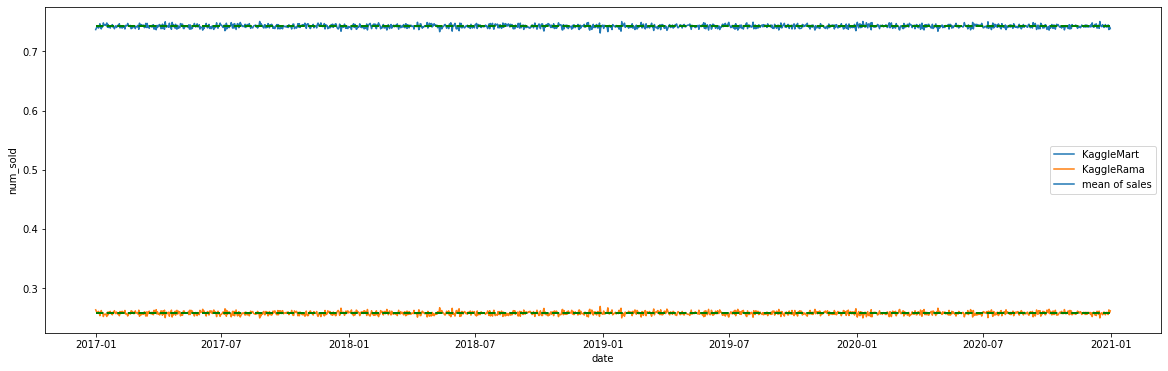

In [ ]:
store_ratio_over_time = (train.groupby(["date","store"])["num_sold"].sum() / train.groupby(["date"])["num_sold"].sum()).reset_index()


plt.figure(figsize=(20,6))

# 시간에 따른 store별 num_sold 비율 시각화
sns.lineplot(x='date',y='num_sold',hue='store',data=store_ratio_over_time,ci=None)
# store별 num_sold 평균치 시각화
plt.hlines(store_weights, min(train["date"]), max(train["date"]),
           linewidth=2,color='g',linestyles = 'dashed', zorder=10)
plt.legend(['KaggleMart','KaggleRama', 'mean of sales'])

시간이 변해도 평균에서 크게 벗어나지 않는 분포를 보인다.

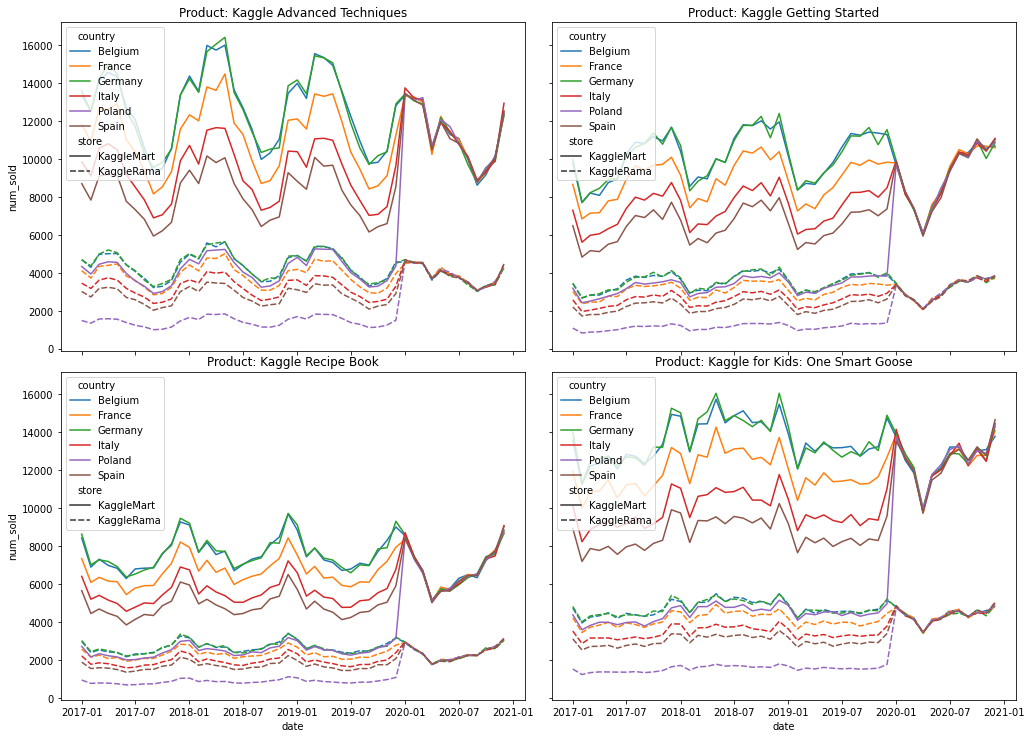

In [ ]:
f,ax = plt.subplots(2,2,figsize=(14,10), sharex = True, sharey=True)
f.tight_layout()
for n,prod in enumerate(monthly_df["product"].unique()):
    plot_df = monthly_df.loc[monthly_df["product"] == prod]
    sns.lineplot(data=plot_df, x="date", y="num_sold", hue="country", style="store",ax=ax[n//2,n%2])
    ax[n//2,n%2].set_title("Product: "+str(prod))

그렇다면 이 그래프에서 KaggleMart에 KaggleMart와 KaggleRama의 상대비중을 나누면 같은 분포를 보일까?

In [ ]:
weights = store_weights.loc["KaggleMart"] / store_weights
weights

store
KaggleMart    1.000000
KaggleRama    2.883719
Name: num_sold, dtype: float64

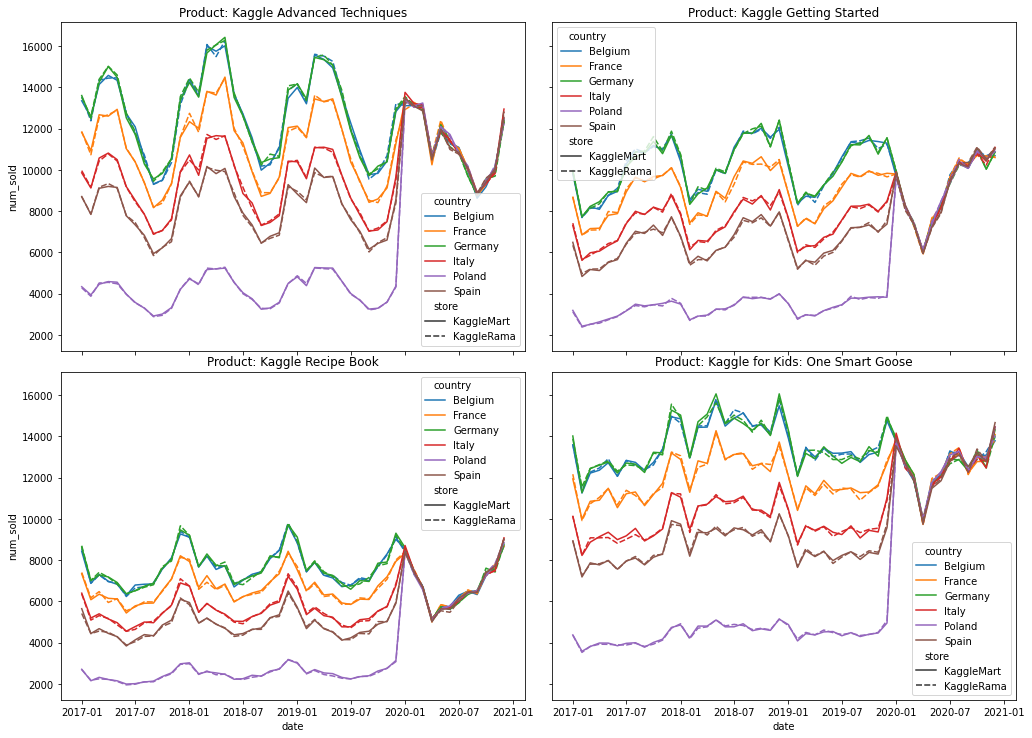

In [ ]:
df = monthly_df.copy()
df.loc[df['store']=='KaggleRama', 'num_sold'] = df.loc[df['store']=='KaggleRama', 'num_sold'] * 2.883719

f,ax = plt.subplots(2,2,figsize=(14,10), sharex = True, sharey=True)
f.tight_layout()
for n,prod in enumerate(df["product"].unique()):
    plot_df = df.loc[df["product"] == prod]
    sns.lineplot(data=plot_df, x="date", y="num_sold", hue="country", style="store",ax=ax[n//2,n%2])
    ax[n//2,n%2].set_title("Product: "+str(prod))

예상대로 KaggleMart와 KaggleRama가 동일한 분포를 보여준다.   
store피처는 target예측에 도움되지 않는다. 
2020년부터 어떠한 일로 인해 지표가 분별력이 사라졌다.   
2020년 이전의 데이터를 통해서 국가별 판매량을 알아보자

## country 피처 탐색

가설 국가별 차이가 있는가?

In [ ]:
#2020년 이전의 국가 num_sold 비율
country_weights = train.loc[train["date"] < "2020-01-01"].groupby("country")["num_sold"].sum()/train.loc[train["date"] < "2020-01-01", "num_sold"].sum()
country_weights

country
Belgium    0.218930
France     0.191360
Germany    0.219586
Italy      0.159383
Poland     0.071348
Spain      0.139393
Name: num_sold, dtype: float64

Text(0, 0.5, 'Proportion of sales')

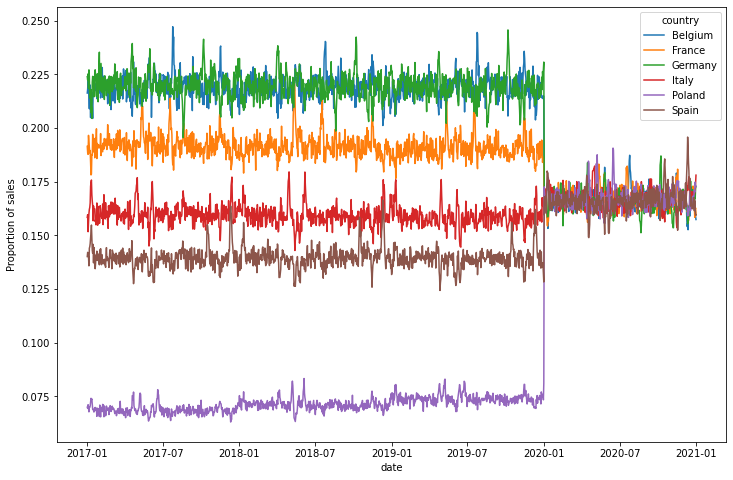

In [ ]:
country_ratio_over_time = (train.groupby(["date","country"])["num_sold"].sum() / train.groupby(["date"])["num_sold"].sum()).reset_index()
plt.figure(figsize=(12,8))
sns.lineplot(x='date',y='num_sold',hue='country',data=country_ratio_over_time,ci=None)
plt.ylabel("Proportion of sales")

이 그래프를 벨기에를 기준으로 나눠보자

In [ ]:
country_ratio_over_time

,date,country,num_sold
0,2017-01-01,Belgium,0.216258
1,2017-01-01,France,0.191441
2,2017-01-01,Germany,0.223880
3,2017-01-01,Italy,0.158351
4,2017-01-01,Poland,0.069958
...,...,...,...
8761,2020-12-31,France,0.159591
8762,2020-12-31,Germany,0.172803
8763,2020-12-31,Italy,0.178028
8764,2020-12-31,Poland,0.172744


country
Belgium    1.000000
France     1.144078
Germany    0.997013
Italy      1.373611
Poland     3.068492
Spain      1.570602
Name: num_sold, dtype: float64

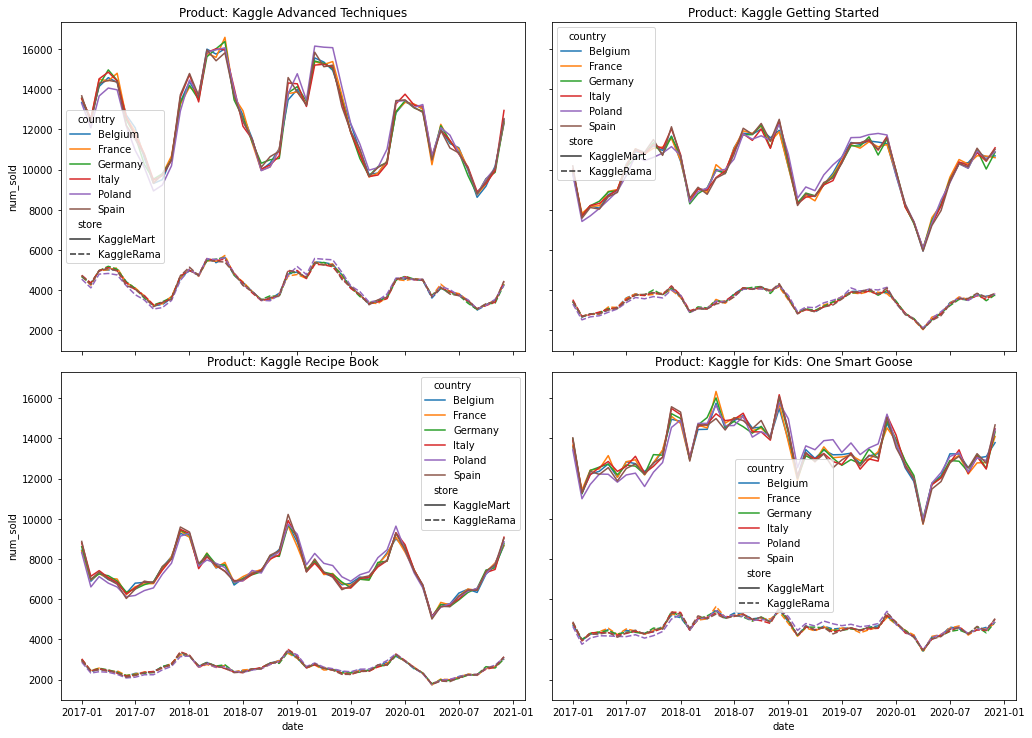

In [ ]:
weights = country_weights.Belgium / country_weights
display(weights)

new_df = monthly_df.copy()
for country in weights.index:
    new_df.loc[(new_df["country"] == country) & (new_df["date"] < "2020-01-01"), "num_sold"] = new_df.loc[(new_df["country"] == country) & (new_df["date"] < "2020-01-01"), "num_sold"] *  weights[country]

f,ax = plt.subplots(2,2,figsize=(14,10), sharex = True, sharey=True)
f.tight_layout()
for n,prod in enumerate(new_df["product"].unique()):
    plot_df = new_df.loc[new_df["product"] == prod]
    sns.lineplot(data=plot_df, x="date", y="num_sold", hue="country", style="store",ax=ax[n//2,n%2])
    ax[n//2,n%2].set_title("Product: "+str(prod))

결론: 국가별 비중의 차이는 있지만 경향은 같다.

폴란드의 분포가 살짝 튀는것을 제외하고는 모두 동일하다.   
2020년 비율에 따라 분류할 수 있다.

store비율, country비율을 통해 각각 분포를 알아봤다.   
store country비율을 동시에 나눠서 일반화해보자.

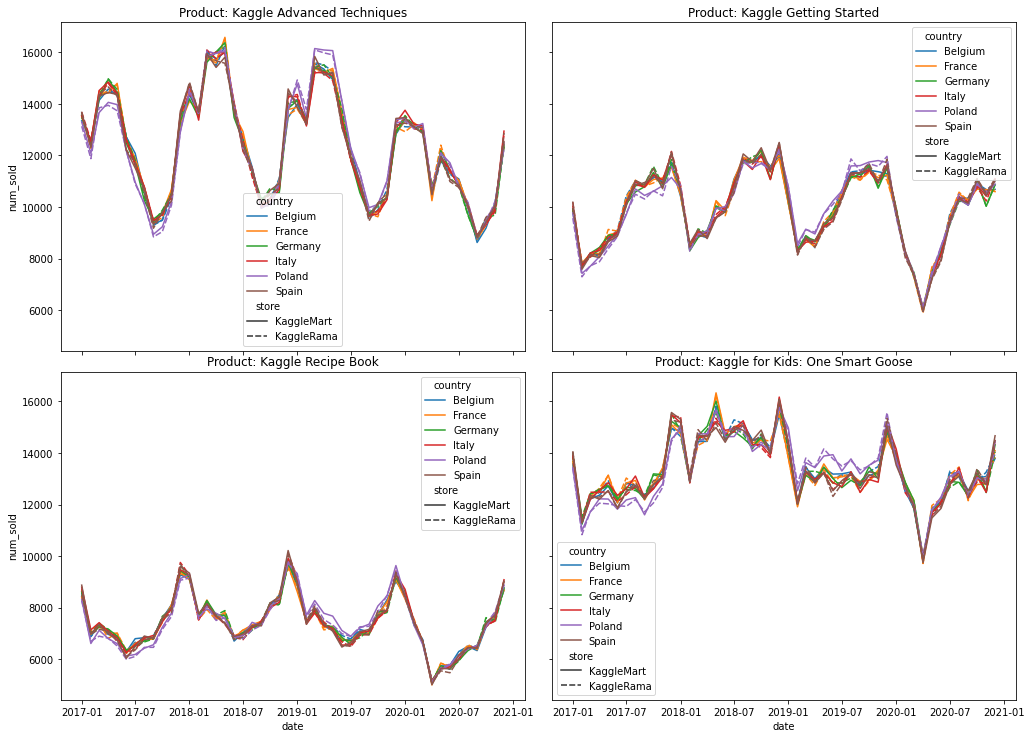

In [ ]:
store_weights_ = store_weights.loc["KaggleMart"] / store_weights
country_weights_ = country_weights.loc['Belgium'] / country_weights

new_df = monthly_df.copy()

for country in country_weights_.index:
        new_df.loc[(new_df["country"] == country) & (new_df["date"] < "2020-01-01"), "num_sold"] = new_df.loc[(new_df["country"] == country) & (new_df["date"] < "2020-01-01"), "num_sold"] *  country_weights_[country]
for store in store_weights_.index:
        new_df.loc[new_df["store"] == store, "num_sold"] = new_df.loc[new_df["store"] == store, "num_sold"] * store_weights_[store]

f,ax = plt.subplots(2,2,figsize=(14,10), sharex = True, sharey=True)
f.tight_layout()
for n,prod in enumerate(new_df["product"].unique()):
    plot_df = new_df.loc[new_df["product"] == prod]
    sns.lineplot(data=plot_df, x="date", y="num_sold", hue="country", style="store",ax=ax[n//2,n%2])
    ax[n//2,n%2].set_title("Product: "+str(prod))     

이 그래프 역시 약간의 폴란드를 제외하고는 모두 동일하다.   
따라서 2020년 이전의 비율을 통해서 예측을 해야한다.

## Product 피처 탐색

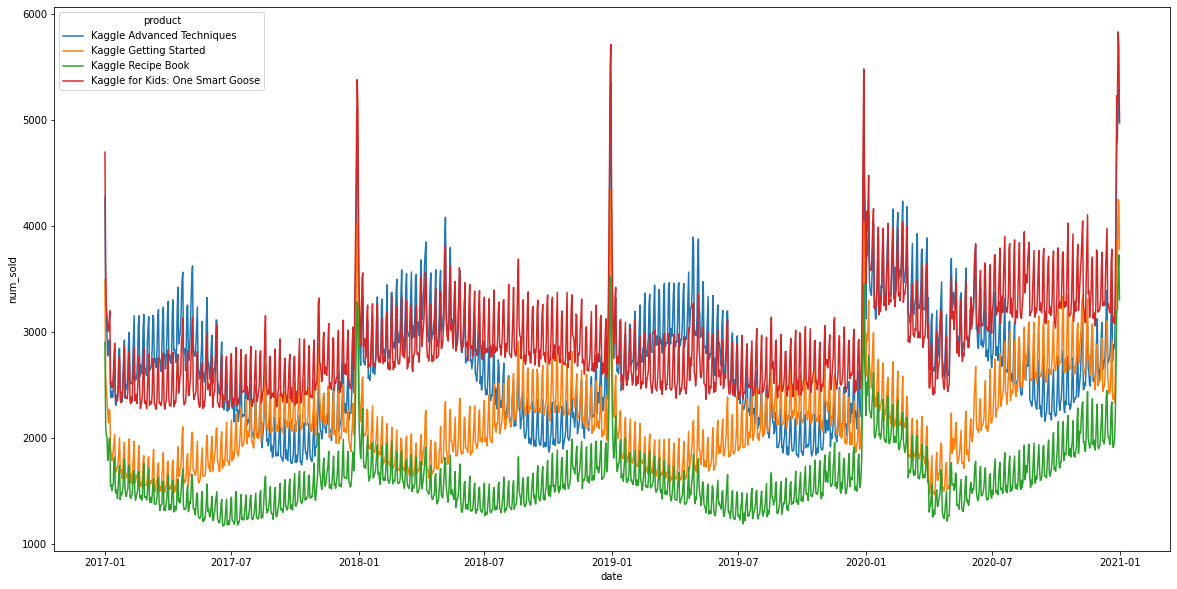

In [ ]:
#상품별 판매량 추이
product_df = train.groupby(["date","product"])["num_sold"].sum().reset_index()
plt.figure(figsize=(20,10))
sns.lineplot(data=product_df, x="date", y="num_sold", hue="product");

In [ ]:
product_ratio_df = product_df.pivot(index="date", columns="product", values="num_sold")
product_ratio_df = product_ratio_df.apply(lambda x: x/x.sum(),axis=1)
product_ratio_df = product_ratio_df.stack().rename("ratios").reset_index()
product_ratio_df

,date,product,ratios
0,2017-01-01,Kaggle Advanced Techniques,0.277944
1,2017-01-01,Kaggle Getting Started,0.227462
2,2017-01-01,Kaggle Recipe Book,0.188900
3,2017-01-01,Kaggle for Kids: One Smart Goose,0.305693
4,2017-01-02,Kaggle Advanced Techniques,0.280014
...,...,...,...
5839,2020-12-30,Kaggle for Kids: One Smart Goose,0.300929
5840,2020-12-31,Kaggle Advanced Techniques,0.291703
5841,2020-12-31,Kaggle Getting Started,0.221948
5842,2020-12-31,Kaggle Recipe Book,0.193823


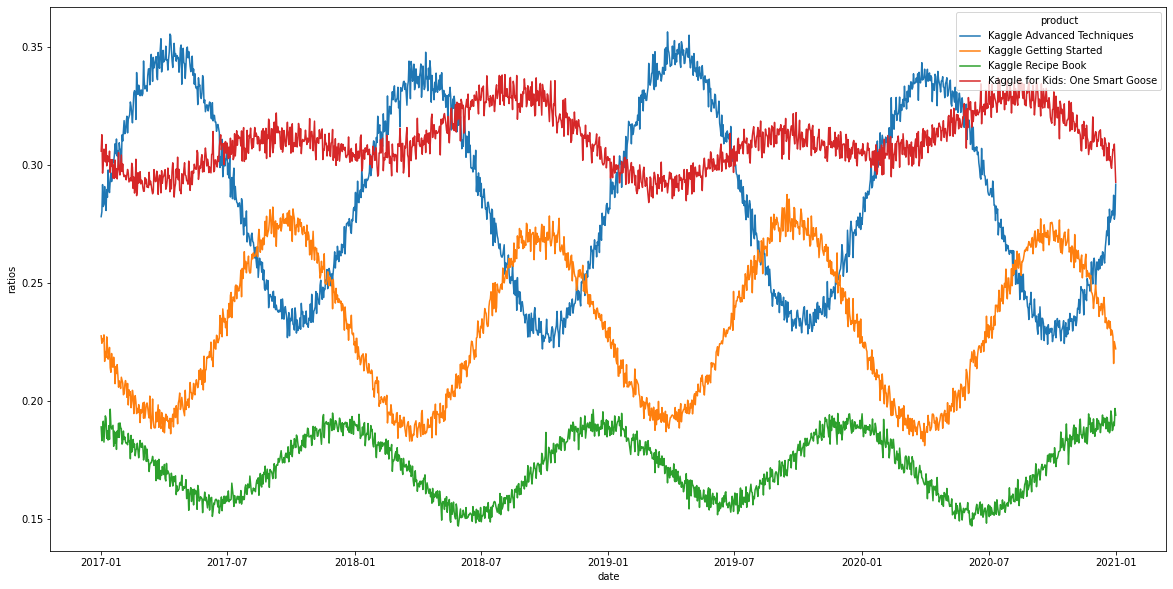

In [ ]:
#상품별 판매량 추이 / 각 상품별 판매량 비중
plt.figure(figsize=(20,10))
sns.lineplot(data = product_ratio_df, x="date", y="ratios", hue="product")

상품별 판매량 비율이 규칙을 가지고 움직인다.

## 요일 월 일 별 판매량 추이

In [ ]:
def plot_seasonality(df, x_axis):
    
    #remove the leap year date
    df = df.loc[df["date"] != "2020-02-29"].copy()

    df["month"] = df["date"].dt.month
    df["day_of_week"] = df["date"].dt.dayofweek
    df["day_of_year"] = df["date"].dt.dayofyear
    #account for leap year
    df["day_of_year"] = df.apply(lambda x: x["day_of_year"]-1 if x["date"] > pd.Timestamp("2020-02-29") else x["day_of_year"], axis=1)
        
    df_no_2020 = df.loc[df["date"] < "2020-01-01"]

    f,axes = plt.subplots(2,1,figsize=(20,16))
    sns.lineplot(data=df, x=x_axis, y="num_sold", ax=axes[0]);
    sns.lineplot(data=df_no_2020, x=x_axis, y="num_sold", ax=axes[1]);
    axes[0].set_title("{} Seasonality - all years".format(x_axis))
    axes[1].set_title("{} Seasonality - not including 2020".format(x_axis))

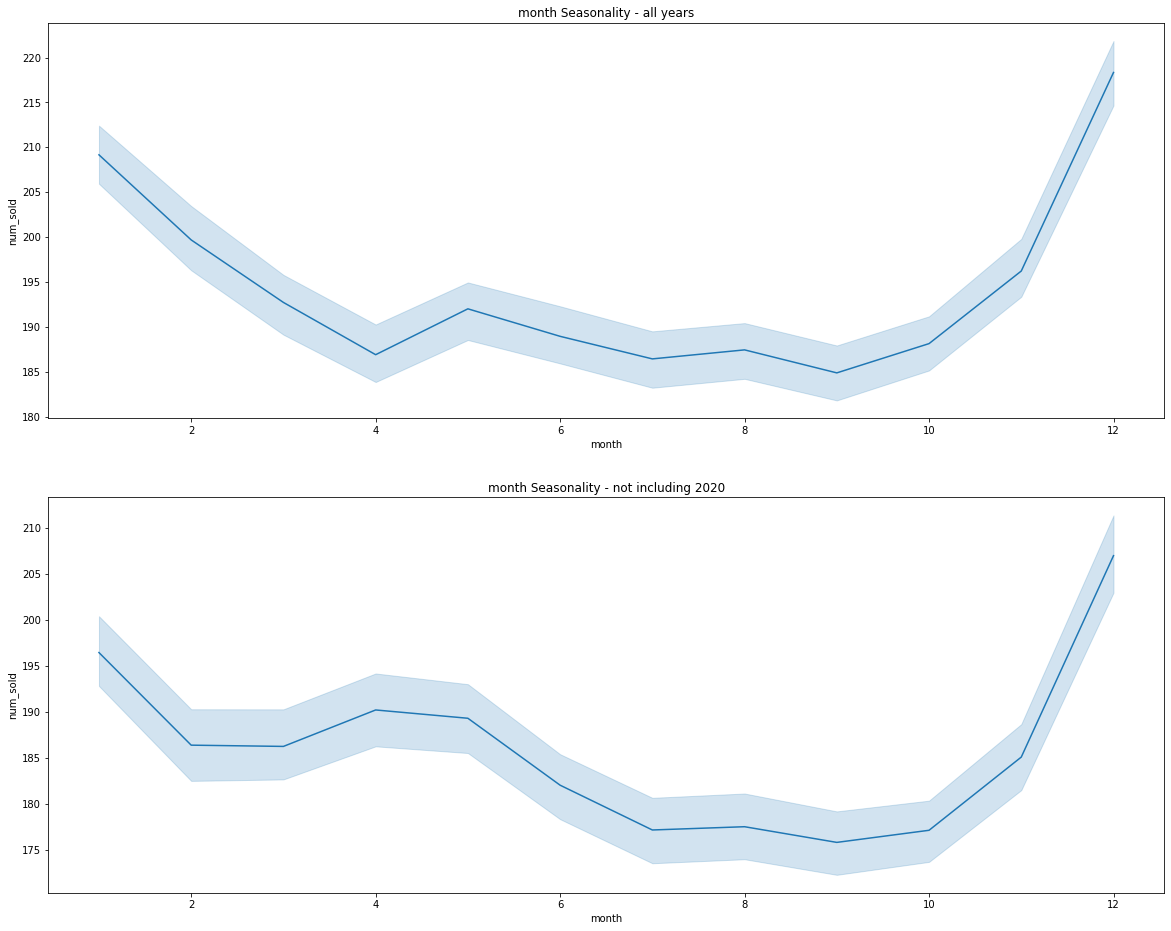

In [ ]:
plot_seasonality(train, "month")

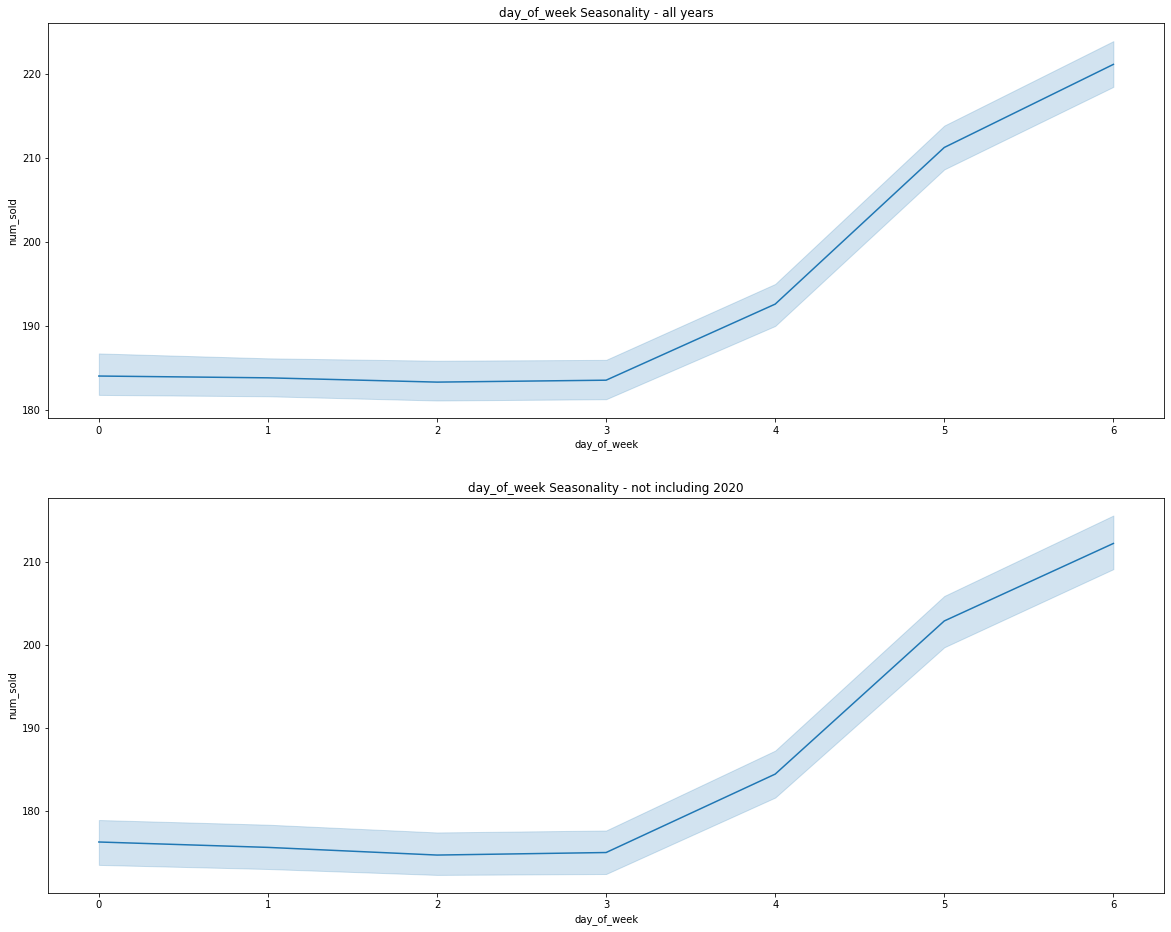

In [ ]:
plot_seasonality(train, "day_of_week")

월화수목, 금, 토, 일 별로 범주로 묶어서 맵핑해도 될것같다.

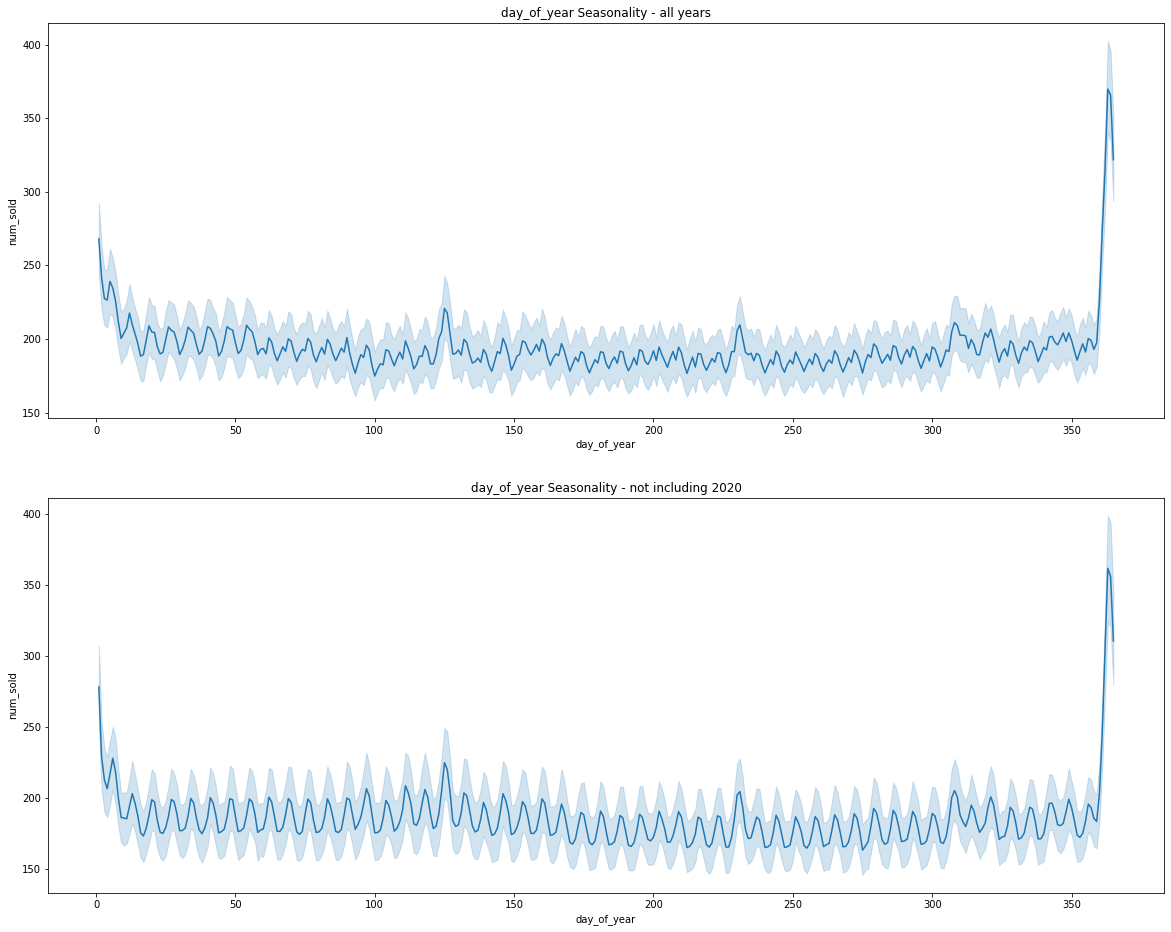

In [ ]:
plot_seasonality(train, "day_of_year")

연초,연말과 특정날(공휴일)에 민감함을 보인다.

# Lasso, Ridge 모델의 특징과 차이점

RSS = $\sum_{i=1}^n(y_i-(\beta_0+\sum_{j=1}^p\beta_jx_{ij}))^2$   
RSS = $\sum(실제Y-(Y예측값))^2$

Lasso = RSS + $\lambda\sum_{j=1}^p\left\vert \beta_j \right\vert$   
Lasso = RSS + $\lambda$독립변수의 기울기      <br><br>
Ridge = RSS + $\lambda\sum_{j=1}^p\left\vert \beta_j^2 \right\vert$     
따라서 Lasso는 L1규제를 통해서 독립변수의 가중치를 작게 만들어 일반화된 모형을 찾는다.(독립변수들의 기울기의 합이 0에 수렴)   
보통 일반선형모델보다 Lasso가 더 점수가 높다면 독립변수의 수를 줄이는게 좋다.   
가중치들이 0이 되게 함으로써 그에 해당하는 특성들을 제외해준다. 결과적으로 모델에서 가장 중요한 특성이 무엇인지 알게되는 등 모델 해석력이 좋아진다.

ridge lasso를 쓰는 이유   
일반적인 선형모델에서 독립변수간 선형종속관계(다중공산성)가 존재한다면 역행렬이 존재하지않아 계산할 수 없게 된다.   
ridge는 임의로 대각행렬에 작은 값을 추가하여 역행렬을 구할 수 있게 만든다.

Ridge와 Lasso는 차이점 또한 존재한다. Ridge와 Lasso의 가장 큰 차이는 Ridge는 계수를 0에 근사하도록 축소하나, Lasso는 계수를 완전하게 0으로 축소시킨다. 그렇기에 Ridge의 경우 입력변수가 전반적으로 비슷한 수준으로 출력변수에 영향을 미치는 경우 사용하고, Lasso의 경우 출력변수에 미치는 입력변수의 영향력 편차가 큰 경우에 사용한다.

보통은 성능이 Ridge와 Elastic-Net이 좋다고 하나, 절대적이지 않다고 한다. 그렇기에 변수선택법이든, 계수축소법이든 모형을 단순화 시킬때 여러 방면으로 확인해보는 작업이 필요하다.   
https://todayisbetterthanyesterday.tistory.com/12

#피처엔지니어링

In [ ]:
def feature_engineer(df):
    new_df = df.copy()

    # 월 피처 생성
    new_df["month"] = df["date"].dt.month
    # 1년 == 12달 sin cos를 통해 주기성 피처 생성
    new_df["month_sin"] = np.sin(new_df['month'] * (2 * np.pi / 12))
    new_df["month_cos"] = np.cos(new_df['month'] * (2 * np.pi / 12))
    
    # 일 피처 생성
    new_df["day"] = df["date"].dt.day
    # 1달은 28,30,31일로 구성되어있음 달마다 다르므로 주기성있는 피처를 어떻게 만들지 고민중
    #new_df["day_sin"] = np.sin(new_df['day'] * (2 * np.pi / 12))
    #new_df["day_cos"] = np.cos(new_df['day'] * (2 * np.pi / 12))
    
    # 요일피처 생성
    new_df["day_of_week"] = df["date"].dt.dayofweek
    # 요일별 target값 시각화했을때 월화수목은 비슷했고 금, 토, 일 순으로 target값이 증가했다. 따라서 0123=0, 4=1, 5=2, 6=3 새로운 피처를 만들어준다.
    new_df["day_of_week"] = new_df["day_of_week"].apply(lambda x: 0 if x<=3 else(1 if x==4 else (2 if x==5 else (3))))
    
    # 월화수목, 금, 토, 일 총 4가지 요일으로 범주를 나눌 수 있었고 이를 금 토 일 피처만 생성해준다(자유도!)
    new_df['friday'] = new_df.date.dt.weekday.eq(4).astype(np.uint8)
    new_df['saturday'] = new_df.date.dt.weekday.eq(5).astype(np.uint8)
    new_df['sunday'] = new_df.date.dt.weekday.eq(6).astype(np.uint8)
    # 창의적인 피처엔지니어링
    new_df['sat+sun'] = new_df['saturday']+new_df['sunday']
    new_df['fri+sun'] = new_df['friday']+new_df['sunday']
    
    #365일을 기준으로 날짜를 환산
    new_df["day_of_year"] = df["date"].dt.dayofyear

    # 코로나 기간을 제외한 날짜 index를 0부터 시작하게 만듦
    new_df["day_of_year"] = new_df.apply(lambda x: x["day_of_year"]-1 if (x["date"] > pd.Timestamp("2020-02-29") and x["date"] < pd.Timestamp("2021-01-01"))  else x["day_of_year"], axis=1)
    
    # 공휴일 새해 년말 등 중요한 날 매핑
    important_dates = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,16,17,22,23,24,105, 123,124, 125, 126, 127, 140, 141,142, 167, 168, 169, 170, 171, 173, 174, 175, 176, 177, 178, 179,
                  180, 181, 203, 230, 231, 232, 233, 234, 282, 289, 290, 307, 308, 309, 310, 311, 312, 313, 317, 318, 319, 320, 360, 361, 362, 363, 364, 365]
    

    new_df["important_dates"] = new_df["day_of_year"].apply(lambda x: x if x in important_dates else 0)
    #new_df["important_dates"] = new_df["day_of_year"].apply(lambda x: x if x in [1,2,3,4,5,6,7,8,125,126,360,361,362,363,364,365] else 0)
    
    
    new_df["year"] = df["date"].dt.year
    #new_df['is_pandemic_year'] = new_df['year'].astype(int) >= 2020
    
    # 문화마다 다르게 계산하는 부활절 3가지를 계산하는 유틸 사용 easter.easter 
    easter_date = new_df.date.apply(lambda date: pd.Timestamp(easter.easter(date.year)))
    # 부활절 D-Day
    for day in list(range(-5, 5)) + list(range(40, 48)):
        new_df[f'easter_{day}'] = (new_df.date - easter_date).dt.days.eq(day)
    # 부활절피처 인코딩
    for col in new_df.columns :
        if 'easter' in col :
            new_df = pd.get_dummies(new_df, columns = [col], drop_first=True)
    # 12월 23-31일 연말 피처 생성
    for day in range(24, 32):
        new_df[f'Dec_{day}'] = new_df.date.dt.day.eq(day) & new_df.date.dt.month.eq(12)
        
        
    new_df = new_df.drop(columns=["date","month","day", "day_of_year"])
    
   
    
    new_df = pd.get_dummies(new_df, columns = ["important_dates","day_of_week"], drop_first=True)
    
    return new_df

In [ ]:
import holidays
def get_holidays(df):
    years_list = [2017, 2018, 2019, 2020, 2021]

    # 국가별 공휴일
    holiday_BE = holidays.CountryHoliday('BE', years = years_list)
    holiday_FR = holidays.CountryHoliday('FR', years = years_list)
    holiday_DE = holidays.CountryHoliday('DE', years = years_list)
    holiday_IT = holidays.CountryHoliday('IT', years = years_list)
    holiday_PL = holidays.CountryHoliday('PL', years = years_list)
    holiday_ES = holidays.CountryHoliday('ES', years = years_list)

    holiday_dict = holiday_BE.copy()
    holiday_dict.update(holiday_FR)
    holiday_dict.update(holiday_DE)
    holiday_dict.update(holiday_IT)
    holiday_dict.update(holiday_PL)
    holiday_dict.update(holiday_ES)

    # 국가별 공휴일 매핑
    df['holiday_name'] = df['date'].map(holiday_dict)
    df['is_holiday'] = np.where(df['holiday_name'].notnull(), 1, 0)
    df['holiday_name'] = df['holiday_name'].fillna('Not Holiday')
    
    return df

In [ ]:
def encode_holiday_names(df, enc, subset='train'):

    if subset=='train':
        df['holiday_name'] = enc.fit_transform(df['holiday_name'].values.reshape(-1,1))
    else:
        df['holiday_name'] = enc.transform(df['holiday_name'].values.reshape(-1,1))
        not_hol_val = oe.transform([['Not Holiday']])[0,0]
        df.loc[df['holiday_name']==-1, 'holiday_name'] = not_hol_val
    return df

In [ ]:
train_df = train.groupby(["date"])["num_sold"].sum().reset_index()
train_df = train_df.loc[~((train["date"] >= "2020-03-01") & (train["date"] < "2020-06-01"))]

test_df = test.groupby(["date"])["row_id"].first().reset_index().drop(columns="row_id")

train_all_df = get_holidays(train_df)
test_all_df = get_holidays(test_df)

train_all_df = feature_engineer(train_all_df)
test_all_df = feature_engineer(test_all_df)

oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

train_all_df = encode_holiday_names(train_all_df, oe)
test_all_df = encode_holiday_names(test_all_df, oe)

In [ ]:
def smape(y_true, y_pred):
    smape = abs(y_true - y_pred) / (abs(y_true) + abs(y_pred))
    smape = smape.mean() * 200
    return smape

In [ ]:
y = train_all_df["num_sold"]
X = train_all_df.drop(columns="num_sold")
X_test = test_all_df

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33)

#모델학습

In [ ]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
linear_preds = linear_model.predict(x_test)

ridge_model = Ridge(tol=1e-2, max_iter=1000000, random_state=42)
ridge_model.fit(x_train, y_train)
ridge_preds = ridge_model.predict(x_test)

lasso_model = Lasso(tol=1e-2, max_iter=1000000, random_state=42)
lasso_model.fit(x_train, y_train)
lasso_preds = lasso_model.predict(x_test)

electic_model = ElasticNet(alpha=0.01, l1_ratio=0.01, random_state=42)
electic_model.fit(x_train, y_train)
electic_preds = electic_model.predict(x_test)

print('lr_pre : ',smape(y_test,linear_preds))
print('ridge_pre : ',smape(y_test,ridge_preds))
print('lasso_pre : ',smape(y_test,lasso_preds))
print('electic_pre : ',smape(y_test,electic_preds))

lr_pre :  6.043515266981492
ridge_pre :  5.724569827893105
lasso_pre :  5.5713960796642255
electic_pre :  5.93043434015329


# 성능개선

## 하이퍼 파라미터 수정 GridSearchCV

In [ ]:
ridge_params = {'alpha' :  0.0001 * np.arange(1, 1000)}
grid = GridSearchCV(estimator = ridge_model, param_grid = ridge_params, scoring = 'neg_mean_absolute_error')

grid.fit(X, y)
best_param = grid.best_params_
print(best_param)

{'alpha': 0.0999}


In [ ]:
lasso_params = {'alpha' :  0.0001 * np.arange(1, 1000) }
grid = GridSearchCV(estimator = lasso_model, param_grid = lasso_params, scoring = 'neg_mean_absolute_error')

grid.fit(X, y)
best_param = grid.best_params_
print(best_param)

{'alpha': 0.0999}


In [ ]:
electic_param = {
     'alpha': 0.0001 * np.arange(1, 100),
     'l1_ratio': 0.001 * np.arange(1, 10)}

grid = GridSearchCV(estimator = electic_model, param_grid = electic_param, scoring = 'neg_mean_absolute_error')
    
grid.fit(X, y)
best_param = grid.best_params_
print(best_param)

{'alpha': 0.0005, 'l1_ratio': 0.009000000000000001}


In [ ]:
ridge_model2 = Ridge(alpha=0.0999, tol=1e-2, max_iter=1000000, random_state=42)
ridge_model2.fit(x_train, y_train)
ridge_preds2 = ridge_model2.predict(x_test)
print('ridge_pre2 : ',smape(y_test,ridge_preds2))

lasso_model2 = Lasso(alpha=0.0999, tol=1e-2, max_iter=1000000, random_state=42)
lasso_model2.fit(x_train, y_train)
lasso_preds2 = lasso_model2.predict(x_test)
print('ridge_pre2 : ',smape(y_test,lasso_preds2))

elastic_model2 = ElasticNet(alpha=0.0005, l1_ratio=0.009, random_state=42)
elastic_model2.fit(x_train, y_train)
elastic_preds2 = elastic_model2.predict(x_test)
print('elastic_pre2 : ',smape(y_test,elastic_preds2))

ridge_pre2 :  5.981519003126615
ridge_pre2 :  5.955551822541951
elastic_pre2 :  5.821395392718387


## Kfold 

In [ ]:
linear_preds = np.zeros(X_test.shape[0])
avg_smape = 0
n=0

kf = GroupKFold(n_splits=4)

for trn_idx, test_idx in kf.split(X, groups=X.year) :
    x_train, x_valid = X.iloc[trn_idx], X.iloc[test_idx]
    y_train, y_valid = y.iloc[trn_idx], y.iloc[test_idx]
    
    linear_model = LinearRegression()
    #linear_model = make_pipeline(StandardScaler(), linear_model)
    linear_model.fit(x_train, y_train)

    y_pred = linear_model.predict(x_valid)
    avg_smape += smape(y_pred, y_valid)

    n = n + 1

    test_pred = linear_model.predict(X_test)
    pred = pd.Series(test_pred) 

    linear_preds += pred / kf.n_splits  
    
print(f"smape: {avg_smape/kf.n_splits}")

smape: 8.492067567931326


In [ ]:
ridge_preds = np.zeros(X_test.shape[0])
avg_smape = 0
n=0

kf = GroupKFold(n_splits=4)

for trn_idx, test_idx in kf.split(X, groups=X.year) :
    x_train, x_valid = X.iloc[trn_idx], X.iloc[test_idx]
    y_train, y_valid = y.iloc[trn_idx], y.iloc[test_idx]
    
    ridge_model = Ridge(alpha=0.0999, tol=1e-2, max_iter=1000000, random_state=0)
    #ridge_model = make_pipeline(StandardScaler(), ridge_model)
    ridge_model.fit(x_train, y_train)

    y_pred = ridge_model.predict(x_valid)
    avg_smape += smape(y_pred, y_valid)

    n = n + 1

    test_pred = ridge_model.predict(X_test)
    pred = pd.Series(test_pred) 

    ridge_preds += pred / kf.n_splits  
    
print(f"smape: {avg_smape/kf.n_splits}")

smape: 8.4806289904186


In [ ]:
lasso_preds = np.zeros(X_test.shape[0])
avg_smape = 0
n=0

kf = GroupKFold(n_splits=4)

for trn_idx, test_idx in kf.split(X, groups=X.year) :
    x_train, x_valid = X.iloc[trn_idx], X.iloc[test_idx]
    y_train, y_valid = y.iloc[trn_idx], y.iloc[test_idx]
    
    lasso_model = Lasso(alpha=0.0999, tol=1e-2, max_iter=1000000, random_state=0)
    #lasso_model = make_pipeline(StandardScaler(), lasso_model)
    lasso_model.fit(x_train, y_train)

    y_pred = lasso_model.predict(x_valid)
    avg_smape += smape(y_pred, y_valid)

    n = n + 1

    test_pred = lasso_model.predict(X_test)
    pred = pd.Series(test_pred) 

    lasso_preds += pred / kf.n_splits  
    
print(f"smape: {avg_smape/kf.n_splits}")

smape: 8.4805413617892


In [ ]:
elastic_preds = np.zeros(X_test.shape[0])
avg_smape = 0
n=0

kf = GroupKFold(n_splits=4)

for trn_idx, test_idx in kf.split(X, groups=X.year) :
    x_train, x_valid = X.iloc[trn_idx], X.iloc[test_idx]
    y_train, y_valid = y.iloc[trn_idx], y.iloc[test_idx]
    
    elastic_model = ElasticNet(alpha=0.0002, l1_ratio=0.001, random_state=42)
    #elastic_model = make_pipeline(StandardScaler(), elastic_model)
    elastic_model.fit(x_train, y_train)

    y_pred = elastic_model.predict(x_valid)
    avg_smape += smape(y_pred, y_valid)

    n = n + 1

    test_pred = elastic_model.predict(X_test)
    pred = pd.Series(test_pred) 

    elastic_preds += pred / kf.n_splits  
    
print(f"smape: {avg_smape/kf.n_splits}")

smape: 8.471059235372339


##optuna

In [ ]:
def lgbm_objective(trial,data=X,target=y):
    
    train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2,random_state=42)

        
    param = {'metric': 'mape', 
        'random_state': 48,
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.006,0.008,0.01,0.014,0.017,0.02, 0.1, 0.04]),
        'max_depth': trial.suggest_categorical('max_depth', [10,20,100]),
        'num_leaves' : trial.suggest_int('num_leaves', 1, 1000),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 300),
        'cat_smooth' : trial.suggest_int('min_data_per_groups', 1, 100),

    }
    model = lgb.LGBMRegressor(**param)  
    
    model.fit(train_x,train_y,eval_set=[(test_x,test_y)],early_stopping_rounds=100,verbose=False)
    
    preds = model.predict(test_x)
    
    metric = smape(test_y, preds)
    
    return metric

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(lgbm_objective, n_trials=30)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

Best_trial=study.best_params

[I 2022-09-28 04:11:54,865] A new study created in memory with name: no-name-2d6701ee-c215-463b-96ed-f7e10af559c9
[I 2022-09-28 04:11:57,984] Trial 0 finished with value: 3.386356834163867 and parameters: {'n_estimators': 351, 'reg_alpha': 0.02800407926777087, 'reg_lambda': 0.0027850359488009943, 'colsample_bytree': 0.9, 'subsample': 1.0, 'learning_rate': 0.02, 'max_depth': 10, 'num_leaves': 656, 'min_child_samples': 4, 'min_data_per_groups': 29}. Best is trial 0 with value: 3.386356834163867.
[I 2022-09-28 04:11:59,512] Trial 1 finished with value: 3.518088909428404 and parameters: {'n_estimators': 871, 'reg_alpha': 1.1897636018955633, 'reg_lambda': 0.02206059613337684, 'colsample_bytree': 0.8, 'subsample': 0.6, 'learning_rate': 0.01, 'max_depth': 20, 'num_leaves': 552, 'min_child_samples': 74, 'min_data_per_groups': 39}. Best is trial 0 with value: 3.386356834163867.
[I 2022-09-28 04:11:59,864] Trial 2 finished with value: 4.128702040273857 and parameters: {'n_estimators': 478, 'reg_

Number of finished trials: 30
Best trial: {'n_estimators': 471, 'reg_alpha': 0.008772360144815592, 'reg_lambda': 0.10846325423784298, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.02, 'max_depth': 20, 'num_leaves': 437, 'min_child_samples': 3, 'min_data_per_groups': 49}


In [ ]:
lgb_preds = np.zeros(X_test.shape[0])
avg_smape = 0
n=0

kf = GroupKFold(n_splits=4)

Best_trial= {'n_estimators': 391, 'reg_alpha': 0.0010356397081781289, 'reg_lambda': 0.00104105557242766, 'colsample_bytree': 0.9, 'subsample': 1.0, 'learning_rate': 0.04, 'max_depth': 20, 'num_leaves': 996, 'min_child_samples': 2, 'min_data_per_groups': 53}
Best_trial['random_state'] = 42
Best_trial['metric'] = 'mape'

for trn_idx, test_idx in kf.split(X, groups=X.year) :
    x_train, x_valid = X.iloc[trn_idx], X.iloc[test_idx]
    y_train, y_valid = y.iloc[trn_idx], y.iloc[test_idx]
    
    lgb_reg = LGBMRegressor(**Best_trial)

    lgb_reg.fit(x_train, y_train, eval_set=[(x_valid, y_valid)], early_stopping_rounds=100, verbose=False)
    y_pred = lgb_reg.predict(x_valid)

    avg_smape += smape(y_pred, y_valid)

    n = n + 1

    test_pred = lgb_reg.predict(X_test)
    pred = pd.Series(test_pred) 

    lgb_preds += pred / kf.n_splits  
    
print(f"smape: {avg_smape/kf.n_splits}")

smape: 9.50007919485193


In [ ]:
models = [linear_model,ridge_model, lasso_model, elastic_model]

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

for i in range(len(models)):
    scores = cross_val_score(models[i],X,y,scoring=make_scorer(smape,greater_is_better=False))
    print(models[i], np.mean(scores))

LinearRegression() -7.27088371421595
Ridge(alpha=0.0999, max_iter=1000000, random_state=0, tol=0.01) -7.26187505070221
Lasso(alpha=0.0999, max_iter=1000000, random_state=0, tol=0.01) -7.255284214401238
ElasticNet(alpha=0.0002, l1_ratio=0.001, random_state=42) -7.250489796414693


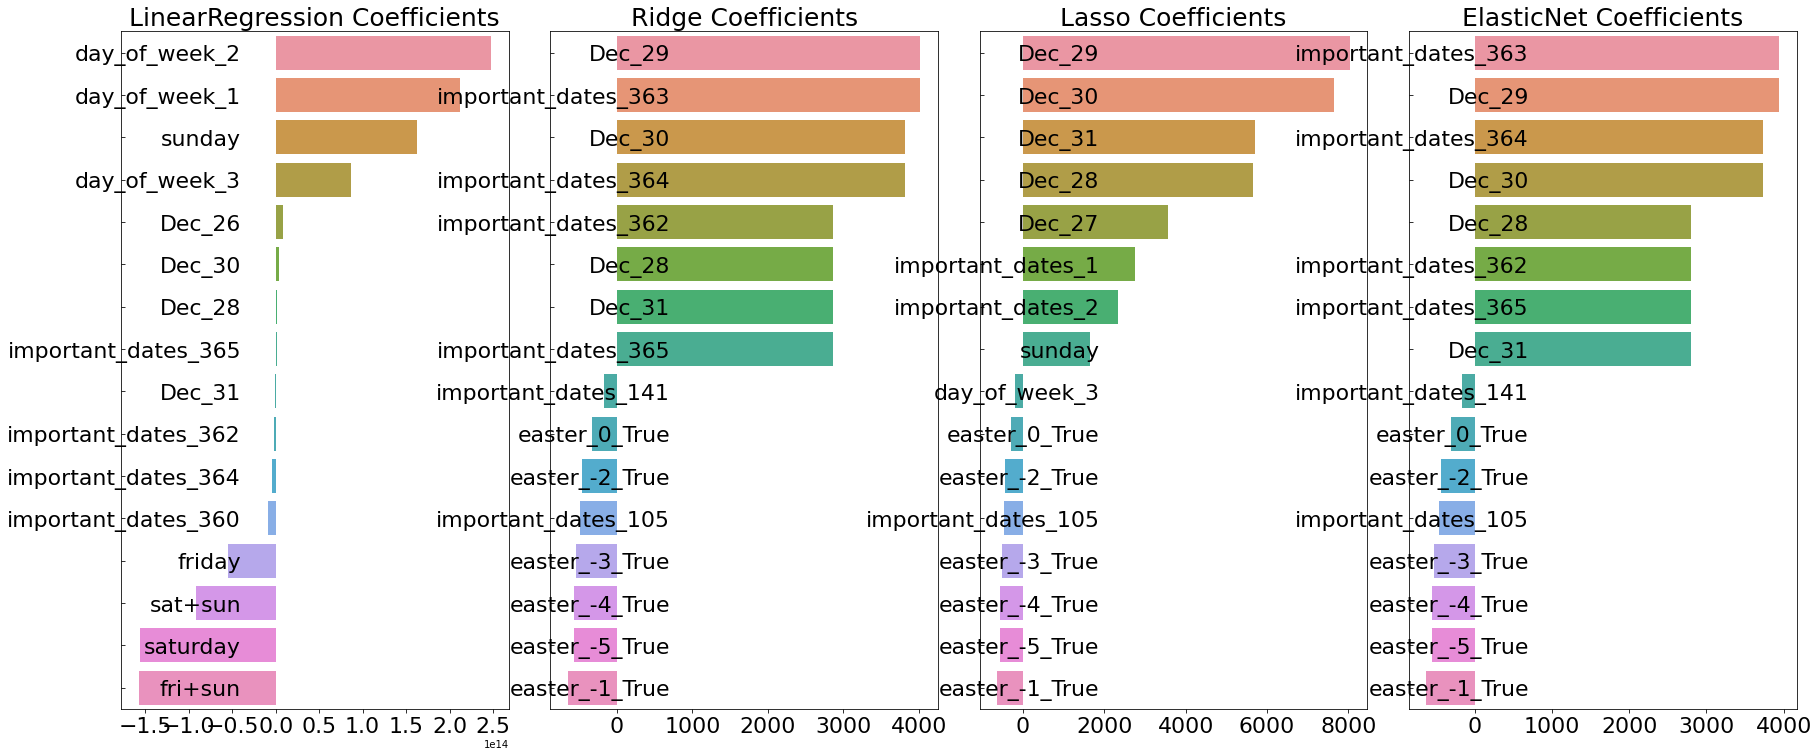

In [ ]:
def get_top_bottom_coef(model, n=8):
    coef = pd.Series(model.coef_,index=X.columns)
    coef_high = coef.sort_values(ascending=False).head(n)
    coef_low = coef.sort_values(ascending=False).tail(n)
    return coef_high, coef_low

def visualize_coefficient(models):
    fig,axs= plt.subplots(figsize=(24,10),nrows=1,ncols=4)
    fig.tight_layout()
    for i_num, model in enumerate(models):
        coef_high,coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat([coef_high,coef_low])
        axs[i_num].set_title(model.__class__.__name__+' Coefficients',size=25)
        axs[i_num].tick_params(axis='y',direction="in",pad=-120)
        for label in (axs[i_num].get_xticklabels()+axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values,y=coef_concat.index,ax=axs[i_num])
        
visualize_coefficient(models)

In [ ]:
product_ratio_2017 = product_ratio_df.loc[product_ratio_df['date'].dt.year == 2017].copy()
product_ratio_2017['mm-dd'] = product_ratio_2017['date'].dt.strftime('%m-%d')
product_ratio_2017 = product_ratio_2017.drop(columns='date')
product_ratio_2017 = product_ratio_2017.reset_index()

In [ ]:
product_ratio_2018 = product_ratio_df.loc[product_ratio_df['date'].dt.year == 2018].copy()
product_ratio_2018['mm-dd'] = product_ratio_2018['date'].dt.strftime('%m-%d')
product_ratio_2018 = product_ratio_2018.drop(columns='date')
product_ratio_2018 = product_ratio_2018.reset_index()

In [ ]:
product_ratio_2019 = product_ratio_df.loc[product_ratio_df['date'].dt.year == 2019].copy()
product_ratio_2019['mm-dd'] = product_ratio_2019['date'].dt.strftime('%m-%d')
product_ratio_2019 = product_ratio_2019.drop(columns='date')
product_ratio_2019 = product_ratio_2019.reset_index()

In [ ]:
product_ratio_2019['mean_ratios'] = (product_ratio_2017['ratios']+product_ratio_2018['ratios']+product_ratio_2019['ratios'])/3
product_ratio_2019

,index,product,ratios,mm-dd,mean_ratios
0,2920,Kaggle Advanced Techniques,0.279273,01-01,0.279244
1,2921,Kaggle Getting Started,0.230832,01-01,0.227723
2,2922,Kaggle Recipe Book,0.188119,01-01,0.189136
3,2923,Kaggle for Kids: One Smart Goose,0.301776,01-01,0.303897
4,2924,Kaggle Advanced Techniques,0.281654,01-02,0.283298
...,...,...,...,...,...
1455,4375,Kaggle for Kids: One Smart Goose,0.304807,12-30,0.303832
1456,4376,Kaggle Advanced Techniques,0.277440,12-31,0.279852
1457,4377,Kaggle Getting Started,0.224633,12-31,0.224372
1458,4378,Kaggle Recipe Book,0.191453,12-31,0.191381


In [ ]:
test_product_ratio_df = test.copy()
test_product_ratio_df['mm-dd'] = test_product_ratio_df['date'].dt.strftime('%m-%d')

test_product_ratio_df = pd.merge(test_product_ratio_df,product_ratio_2019, how="left", on = ["mm-dd","product"])
test_product_ratio_df.head()

,row_id,date,country,store,product,mm-dd,index,ratios,mean_ratios
0,70128,2021-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,01-01,2920,0.279273,0.279244
1,70129,2021-01-01,Belgium,KaggleMart,Kaggle Getting Started,01-01,2921,0.230832,0.227723
2,70130,2021-01-01,Belgium,KaggleMart,Kaggle Recipe Book,01-01,2922,0.188119,0.189136
3,70131,2021-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,01-01,2923,0.301776,0.303897
4,70132,2021-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,01-01,2920,0.279273,0.279244


In [ ]:
test_all_df = test_df.groupby(["date"]).first().reset_index()

test_all_df_dates = test_all_df[["date"]]
test_all_df_dates["num_sold"] = ridge_preds * 0.4 + lasso_preds * 0.4 + linear_preds * 0.2 + elastic_preds * 0 
test_all_df_dates

,date,num_sold
0,2021-01-01,14026.220872
1,2021-01-02,14095.602878
2,2021-01-03,13745.193957
3,2021-01-04,11596.607950
4,2021-01-05,11760.153841
...,...,...
360,2021-12-27,13717.360414
361,2021-12-28,15813.175944
362,2021-12-29,18008.934943
363,2021-12-30,17936.914912


In [ ]:
test_sub_df = pd.merge(test, test_all_df_dates, how="left")
test_sub_df["ratios"] = test_product_ratio_df["ratios"]
test_sub_df["mean_ratios"] = test_product_ratio_df["mean_ratios"]
test_sub_df.head()

,row_id,date,country,store,product,num_sold,ratios,mean_ratios
0,70128,2021-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,14026.220872,0.279273,0.279244
1,70129,2021-01-01,Belgium,KaggleMart,Kaggle Getting Started,14026.220872,0.230832,0.227723
2,70130,2021-01-01,Belgium,KaggleMart,Kaggle Recipe Book,14026.220872,0.188119,0.189136
3,70131,2021-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,14026.220872,0.301776,0.303897
4,70132,2021-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,14026.220872,0.279273,0.279244


In [ ]:
def disaggregate_forecast(df) :
    new_df = df.copy()
    
    store_weights = train.groupby('store')['num_sold'].sum()/train['num_sold'].sum()
    print(store_weights)
    country_weights = pd.Series(index = test["country"].unique(),data = 1/6)
    print(country_weights)

    for country in country_weights.index:
        print(country)
        new_df.loc[(new_df["country"] == country), "num_sold"] = new_df.loc[(new_df["country"] == country), "num_sold"] * country_weights[country]

    for store in store_weights.index:
        new_df.loc[new_df["store"] == store, "num_sold"] = new_df.loc[new_df["store"] == store, "num_sold"] * store_weights[store]
        
    #new_df["num_sold"] = new_df["num_sold"] * new_df["ratios"]
    new_df["num_sold"] = new_df["num_sold"] * new_df["mean_ratios"]
    new_df["num_sold"] = new_df["num_sold"].round()
    new_df = new_df.drop(columns=["ratios"])    
    
    return new_df

In [ ]:
final_df = disaggregate_forecast(test_sub_df)
final_df

store
KaggleMart    0.742515
KaggleRama    0.257485
Name: num_sold, dtype: float64
Belgium    0.166667
France     0.166667
Germany    0.166667
Italy      0.166667
Poland     0.166667
Spain      0.166667
dtype: float64
Belgium
France
Germany
Italy
Poland
Spain
       row_id       date  country       store  \
0       70128 2021-01-01  Belgium  KaggleMart   
1       70129 2021-01-01  Belgium  KaggleMart   
2       70130 2021-01-01  Belgium  KaggleMart   
3       70131 2021-01-01  Belgium  KaggleMart   
4       70132 2021-01-01  Belgium  KaggleRama   
...       ...        ...      ...         ...   
17515   87643 2021-12-31    Spain  KaggleMart   
17516   87644 2021-12-31    Spain  KaggleRama   
17517   87645 2021-12-31    Spain  KaggleRama   
17518   87646 2021-12-31    Spain  KaggleRama   
17519   87647 2021-12-31    Spain  KaggleRama   

                                product     num_sold    ratios  mean_ratios  
0            Kaggle Advanced Techniques  2337.703479  0.279273     0.2792

,row_id,date,country,store,product,num_sold,mean_ratios
0,70128,2021-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,485.0,0.279244
1,70129,2021-01-01,Belgium,KaggleMart,Kaggle Getting Started,395.0,0.227723
2,70130,2021-01-01,Belgium,KaggleMart,Kaggle Recipe Book,328.0,0.189136
3,70131,2021-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,527.0,0.303897
4,70132,2021-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,168.0,0.279244
...,...,...,...,...,...,...,...
17515,87643,2021-12-31,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,626.0,0.304394
17516,87644,2021-12-31,Spain,KaggleRama,Kaggle Advanced Techniques,200.0,0.279852
17517,87645,2021-12-31,Spain,KaggleRama,Kaggle Getting Started,160.0,0.224372
17518,87646,2021-12-31,Spain,KaggleRama,Kaggle Recipe Book,137.0,0.191381


In [ ]:
sub["num_sold"] = final_df["num_sold"]
sub.to_csv('submission.csv', index = False)